In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from ipywidgets import IntProgress
from IPython.display import display, HTML

import base
import fund_scanner.common_tools.database as db
engine = db.get_sqlalchemy_engine(dbname='stock_index')

import logging
import fund_scanner.common_tools.logger as logger
log = logging.getLogger('view_indexes')


In [2]:
df = pd.read_sql('select * from stock_indexes where `发布日期` between "2017-08-05" and Now();', engine)
df_to_plot = pd.DataFrame([])
for code in df['index_code'].unique():
    df_one_kind = df.loc[df['index_code']==code, ['序号','行业','行业指数','涨跌幅','发布日期','index_code']]
    df_one_kind = df_one_kind.reset_index().set_index('发布日期')
    
    industry_name = df_one_kind['行业'].iloc[0]
    first_number = df_one_kind['行业指数'].iloc[0]
    df_to_plot[industry_name] = df_one_kind['行业指数'] / first_number * 100

df_to_plot = df_to_plot.sort_values(by=df_to_plot.last_valid_index(), axis=1, ascending=False)
display(df_to_plot)

,计算机应用,新材料,仪器仪表,计算机设备,半导体及元件,环保工程,光学光电子,通信设备,其他电子,电子制造,...,视听器材,电力,保险及其他,医药商业,基础化学,公路铁路运输,汽车整车,银行,港口航运,酒店及餐饮
发布日期,,,,,,,,,,,,,,,,,,,,,
2017-08-05,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-08-07,100.457447,102.897005,100.385659,100.541722,100.713256,101.135129,101.347341,100.686732,100.264554,100.510100,...,100.446855,100.761785,99.678457,100.730481,100.400396,99.779462,100.341357,99.879325,101.248030,100.132831
2017-08-08,102.007170,103.830557,101.212986,101.168301,101.343824,101.637944,101.819785,100.986948,100.425347,100.449388,...,100.175133,100.820707,100.522223,100.545757,99.848414,99.968219,100.213112,99.671967,101.326338,101.407288
2017-08-09,101.702340,106.390810,100.898858,101.091021,101.413164,102.431817,101.125588,100.983888,100.470398,100.219238,...,99.977710,100.788721,99.786941,100.793592,99.980834,99.312384,100.870680,98.256155,100.380772,101.899838
2017-08-10,101.040467,105.271109,99.415945,100.574680,100.600945,100.821714,100.108353,99.823727,98.991388,99.824411,...,98.366485,100.159933,98.657792,100.096169,98.610985,98.805821,99.608980,98.511953,100.234923,100.279304
2017-08-11,100.151010,101.657102,99.031973,99.866653,99.625956,100.128024,98.965603,99.099047,97.943715,98.723659,...,96.444973,98.512626,97.169962,99.706485,94.890335,96.127296,98.061872,96.472368,97.504429,98.609944
2017-08-14,104.031610,103.970871,102.099023,103.463233,102.451633,103.258382,102.199019,101.549432,100.529827,101.625137,...,98.004543,99.489899,98.585470,100.945058,96.201989,97.323690,99.050738,96.663579,98.843982,99.964818
2017-08-15,104.783847,104.917519,102.570384,104.505006,103.484568,103.234549,103.291966,101.870763,101.473259,102.987189,...,98.935049,99.764310,99.653697,101.052246,97.441857,97.546154,99.288368,97.928971,98.928162,100.117035
2017-08-16,107.524111,104.309026,104.317489,106.469601,104.865504,104.459738,104.780637,103.967683,103.746412,104.938306,...,99.556329,100.470539,99.659236,101.722822,97.147397,97.824475,99.796317,97.588191,98.507258,100.135703


In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
df_to_tsne = df_to_plot.copy()
df_to_tsne = (df_to_tsne - df_to_tsne.shift(1)) / df_to_tsne
df_to_tsne = df_to_tsne.dropna().T


In [4]:
#display(df_to_tsne)
model = TSNE(n_components=2, learning_rate=10)
df_result = pd.DataFrame(model.fit_transform(df_to_tsne))
df_result.columns = ['pos_x', 'pos_y']
df_to_tsne = df_to_tsne.reset_index()
df_result = pd.concat([df_to_tsne, df_result], axis=1)
#display(df_result)

df_pos = df_result.set_index('index').loc[:,['pos_x', 'pos_y']].T
display(df_pos)

index,计算机应用,新材料,仪器仪表,计算机设备,半导体及元件,环保工程,光学光电子,通信设备,其他电子,电子制造,...,视听器材,电力,保险及其他,医药商业,基础化学,公路铁路运输,汽车整车,银行,港口航运,酒店及餐饮
pos_x,-2.252156,-0.468981,-1.971563,-1.594502,-1.534656,-1.950805,-1.733218,-2.301917,-2.137914,-2.082926,...,-1.624173,0.873866,0.492038,1.146353,0.145758,1.541760,1.423737,0.685399,1.463292,2.596171
pos_y,2.247870,-3.489943,1.836556,2.207977,1.877925,-1.132515,0.932748,1.628726,1.455134,1.437659,...,-0.289759,-0.973168,2.036108,0.523017,-2.318125,-1.359498,-0.735957,2.337269,-1.651144,-0.387086


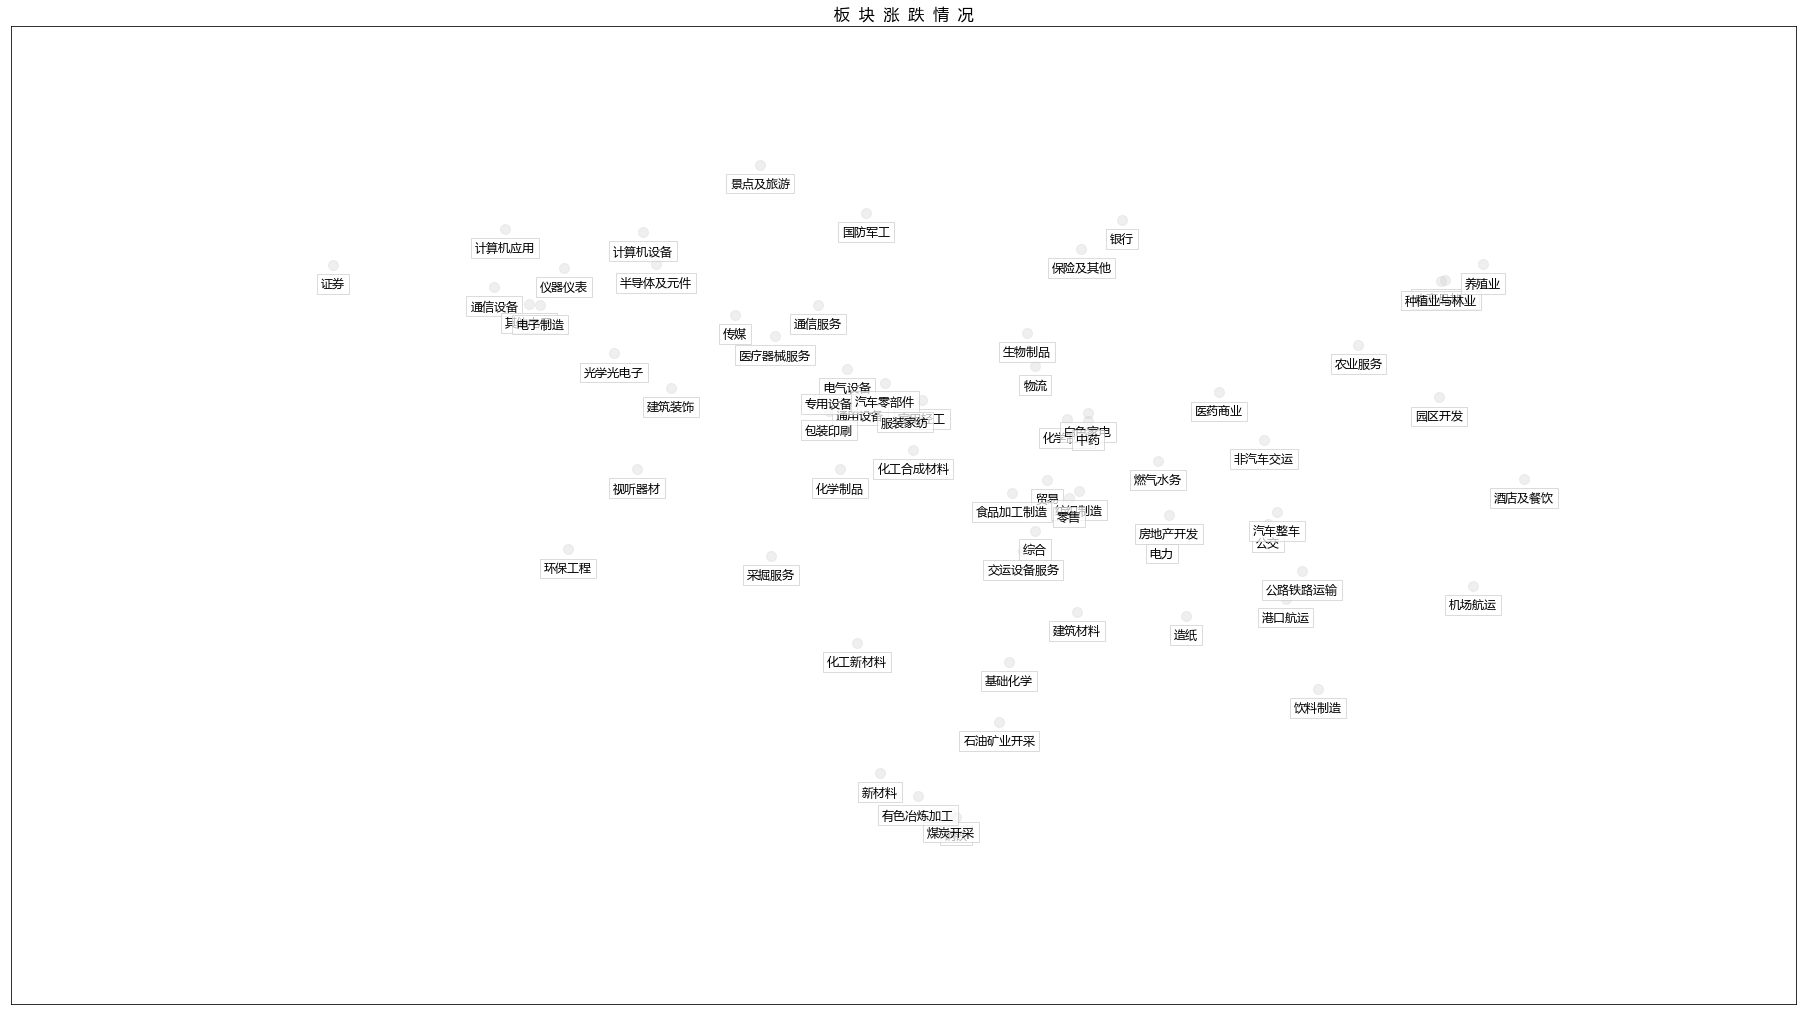

In [5]:
pos_type = 'tsne' # 'tsne' or 'matrix'

lst_industry_names = df_to_plot.columns.tolist()


items_each_row = 11
bubble_size_max = 1e4
bubble_size_middle = 1e2
bubble_size_min = 10
subtitle_offset_x = 0
subtitle_offset_y = -0.2
title_prefix = u'板 块 涨 跌 情 况'

fig = plt.figure(figsize=[32,18])
ax = fig.gca()
ax.set_xticks([])
ax.set_yticks([])
element_date = ax.set_title(title_prefix, fontsize=16)

if pos_type=='matrix':
    ax.set_xlim(0, items_each_row+1)
    ax.set_ylim(len(lst_industry_names) // items_each_row + 1, 0)
elif pos_type=='tsne':
    ax.set_xlim(df_pos.loc['pos_x', :].min()*1.5, df_pos.loc['pos_x', :].max()*1.5)
    ax.set_ylim(df_pos.loc['pos_y', :].min()*1.5, df_pos.loc['pos_y', :].max()*1.5)

i=0
element_scat = []
element_text = []
for industry_name in lst_industry_names:
    if pos_type=='matrix':
        pos_x = i % items_each_row + 1
        pos_y = i // items_each_row + 1
    elif pos_type=='tsne':
        pos_x = df_pos.loc['pos_x', industry_name]
        pos_y = df_pos.loc['pos_y', industry_name]
    
    scat = ax.scatter(pos_x, pos_y, s=bubble_size_middle, facecolor=(0.8,0.8,0.8,1), alpha=0.3)
    text = ax.text(pos_x+subtitle_offset_x, pos_y+subtitle_offset_y, industry_name, fontsize=12, 
                   horizontalalignment='center', verticalalignment='center',
                   bbox=dict(facecolor='white', edgecolor=(0.8,0.8,0.8,1), alpha=0.7))
    element_scat.append(scat)
    element_text.append(text)
    i=i+1



In [6]:
frames_per_day = 10
g_max = df_to_plot.max().max()
g_min = df_to_plot.min().min()
target_size = [bubble_size_middle] * len(element_scat)
last_size = [bubble_size_middle] * len(element_scat)

progress = IntProgress(min=0, max=(len(df_to_plot)+1)*frames_per_day-1, value=0)
display(progress)

def update(frame):
    global target_size, last_size, progress, frames_per_day, df_to_plot
    global element_date, element_scat, element_text
    progress.value = frame
    if progress.max <= frame:
        progress.bar_style = 'success'
    row = frame // frames_per_day
    last = frame % frames_per_day
    #print(row, last, len(df_to_plot))
    if (row<len(df_to_plot)):
        for idx, scat in enumerate(element_scat):
            if last==0:
                element_date.set_text(title_prefix + df_to_plot.iloc[row].name.strftime('%Y年 %m月 %d日 星期%w'))
                last_size[idx] = target_size[idx]
                val = df_to_plot.iloc[row, idx]
                target_size[idx] = (val - g_min) * (bubble_size_max-bubble_size_min) / (g_max - g_min) + bubble_size_min
                if target_size[idx]>last_size[idx]:
                    scat.set_facecolors(['red'])
                elif target_size[idx]<last_size[idx]:
                    scat.set_facecolors(['green'])
                else:
                    scat.set_facecolors([(0.8,0.8,0.8,1)])
                #if (idx==1):
                    #print('last_size:',last_size[idx],'target_size:',target_size[idx])
            size = (target_size[idx] - last_size[idx]) * last / frames_per_day + last_size[idx]
            
            scat.set_sizes([size])
        return element_scat
    return

animation = FuncAnimation(fig, update, interval=100, blit=False, frames=(len(df_to_plot)+1)*frames_per_day)
display(HTML(animation.to_html5_video()))
progress.close()


In [7]:
#animation.save('../tmp/3days.gif', writer='imagemagick', fps=30, dpi=40)